In [1]:
import datetime as dt
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cross_validation import  train_test_split
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None

C:\Users\TP040804\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def is_nan(val):
    return val != val

def less_than_ten(val):
    if int(val) < 10:
        return "0" + val
    else:
        return val

In [3]:
pwd

'C:\\Users\\TP040804\\FYP_Final\\RandomForest'

In [4]:
import os
os.chdir ('D:\Semester 2 (Final)\FYP (Final)\Dataset\Rossman\Working\Modelling_dataset')

In [5]:
train_store = pd.read_csv("ModellingTrainData2.csv")
test_store = pd.read_csv("ModellingTestData2.csv")

###### Remove all Closed Stores where Sales = 0 in train dataset

In [6]:
train_store = train_store[train_store["Open"] != 0]

###### Save IDs of Closed Stores ("Sales" = 0 assigned later) & Remove Rows

In [7]:
closed_store_ids =test_store["Id"][test_store["Open"] == 0].values
test_store = test_store[test_store["Open"] != 0]

###### Log_Competition Distance

###### train dataset

In [8]:
LogCompetition = train_store['CompetitionDistance']
train_store = train_store.drop(['CompetitionDistance'], axis=1)

In [9]:
LogCompetition = np.log(LogCompetition + 1)
LogCompetition.head()

0    7.147559
1    7.147559
2    7.147559
3    7.147559
4    7.147559
Name: CompetitionDistance, dtype: float64

In [10]:
train_store['CompetitionDistance'] = LogCompetition 

###### test dataset

In [11]:
LogCompetition2 = test_store['CompetitionDistance']
test_store = test_store.drop(['CompetitionDistance'], axis=1)
LogCompetition2 = np.log(LogCompetition2 + 1)
LogCompetition2.head()

0    7.147559
1    7.147559
2    7.147559
3    7.147559
5    7.147559
Name: CompetitionDistance, dtype: float64

In [12]:
test_store['CompetitionDistance'] = LogCompetition2 

###### Drop Customer and Open feature

In [13]:
train_store = train_store.drop(['Customers'], axis=1)

In [14]:
train_store = train_store.drop(['Open'], axis=1)

In [15]:
test_store = test_store.drop(['Open'], axis=1)

###### Selecting top 13 feature  from Correlation

##### Train

In [16]:
#train_store = train_store.drop(['SchoolHoliday_1','SchoolHoliday_0'], axis=1)

In [17]:
#train_store = train_store.drop(['Promo2SinceWeek'], axis=1)

In [18]:
#train_store = train_store.drop(['CompetitionDistance'], axis=1)

In [19]:
#train_store = train_store.drop(['CompetitionOpenSinceMonth'], axis=1)

In [20]:
#train_store = train_store.drop(['Month'], axis=1)

In [21]:
#train_store = train_store.drop(['DayOfYear'], axis=1)

In [22]:
train_store = train_store.drop(['StateHoliday_b','StateHoliday_c'], axis=1)

In [23]:
#train_store = train_store.drop(['StateHoliday_0','StateHoliday_a'], axis=1)

In [24]:
#train_store = train_store.drop(['Promo2SinceYear'], axis=1)

In [25]:
#train_store = train_store.drop(['AvgSalesPerCustomer'], axis=1)

In [26]:
#train_store = train_store.drop(['Promo2'], axis=1)

In [27]:
#train_store = train_store.drop(['PromoInterval_0','PromoInterval_Feb,May,Aug,Nov','PromoInterval_Jan,Apr,Jul,Oct','PromoInterval_Mar,Jun,Sept,Dec'], axis=1)

In [28]:
#train_store = train_store.drop(['Assortment_a','Assortment_b','Assortment_c'], axis=1)

In [29]:
#train_store = train_store.drop(['DayOfWeek_2','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7'], axis=1)

##### test

In [30]:
#test_store = test_store.drop(['SchoolHoliday_1','SchoolHoliday_0'], axis=1)

In [31]:
#test_store = test_store.drop(['Year'], axis=1)

In [32]:
#test_store = test_store.drop(['CompetitionDistance'], axis=1)

In [33]:
#test_store = test_store.drop(['CompetitionOpenSinceMonth'], axis=1)

In [34]:
#test_store = test_store.drop(['Month'], axis=1)

In [35]:
#test_store = test_store.drop(['DayOfYear'], axis=1)

In [36]:
#test_store = test_store.drop(['StateHoliday_0','StateHoliday_a'], axis=1)

In [37]:
#test_store = test_store.drop(['AvgSalesPerCustomer'], axis=1)

In [38]:
#test_store = test_store.drop(['Promo2SinceYear'], axis=1)

In [39]:
#test_store = test_store.drop(['Promo2'], axis=1)

In [40]:
#test_store = test_store.drop(['PromoInterval_Feb,May,Aug,Nov','PromoInterval_Jan,Apr,Jul,Oct','PromoInterval_Mar,Jun,Sept,Dec'], axis=1)

In [41]:
#test_store = test_store.drop(['PromoInterval_0'], axis=1)

In [42]:
#test_store = test_store.drop(['Assortment_a','Assortment_b','Assortment_c'], axis=1)

In [43]:
#test_store = test_store.drop(['SchoolHoliday_1','SchoolHoliday_0'], axis=1)

In [44]:
#test_store = test_store.drop(['Promo2SinceWeek'], axis=1)

In [45]:
#test_store = test_store.drop(['DayOfWeek_2','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7'], axis=1)

In [46]:
print(train_store.keys())

Index(['Store', 'Sales', 'Promo', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'DayOfYear', 'Week',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_0',
       'StateHoliday_a', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'SchoolHoliday_0', 'SchoolHoliday_1', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'AvgSalesPerCustomer',
       'AvgSalesPerStore', 'AvgCustStore', 'AvgCustStoreMonth',
       'AvgCustStoreYear', 'CompetitionDistance'],
      dtype='object')


In [47]:
print(test_store.keys())

Index(['Id', 'Store', 'Promo', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'DayOfYear', 'Week',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_0',
       'StateHoliday_a', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'SchoolHoliday_0', 'SchoolHoliday_1', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'AvgSalesPerCustomer',
       'AvgSalesPerStore', 'AvgCustStore', 'AvgCustStoreMonth',
       'AvgCustStoreYear', 'CompetitionDistance'],
      dtype='object')


In [48]:
X = train_store.drop('Sales', axis=1)
y = train_store['Sales']
y = np.log(y + 1)
test = test_store.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(513588, 40) (513588,)
(128397, 40) (128397,)


In [49]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [50]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
scores = cross_val_score(model, X, y, cv=5, scoring ="r2")
print ("Cross-validated scores:", scores)
print(scores.mean())

Cross-validated scores: [0.79406538 0.80654951 0.81651568 0.79634162 0.78550608]
0.7997956544723148


In [51]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [52]:
yr = model.predict(X_test)

In [53]:
def rmspe(y_true, y_pred):
    w = np.zeros(y_true.shape, dtype=float)
    index = y_true != 0
    w[index] = 1.0 / (y_true[index])
    diff = y_true - y_pred
    diff_percentage = diff * w
    diff_percentage_squared = diff_percentage ** 2
    rmspe = np.sqrt(np.mean(diff_percentage_squared))
    return rmspe

In [54]:
print("RMSPE: " + str(rmspe(y_true=y_test, y_pred=yr)))

RMSPE: 0.013385169852075636


###### Convert to actual value from Logarithm 

In [55]:
yr = np.exp(yr) - 1

In [56]:
y_test = np.exp(y_test) - 1

In [57]:
print("RMSPE: " + str(rmspe(y_true=y_test, y_pred=yr)))

RMSPE: 0.11967094506709394


###### Submission

In [58]:
store_ids = test["Id"]
test.drop(["Id"], axis=1, inplace=True)
test = test.reindex(columns=X_train.columns, fill_value=0)
yr = model.predict(test)
yr = np.exp(yr) - 1

In [59]:
predictions = Series()

In [60]:
predictions = predictions.append(Series(yr, index=store_ids))
predictions = predictions.append(Series(0, index=closed_store_ids))

In [61]:
submission = pd.DataFrame({"Id": predictions.index, "Sales": predictions.values})
submission.to_csv("Submission/RandomForestRegression_RF.csv", index=False)
print("Predictions saved.")

Predictions saved.


In [79]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [85]:
from sklearn.tree import export_graphviz

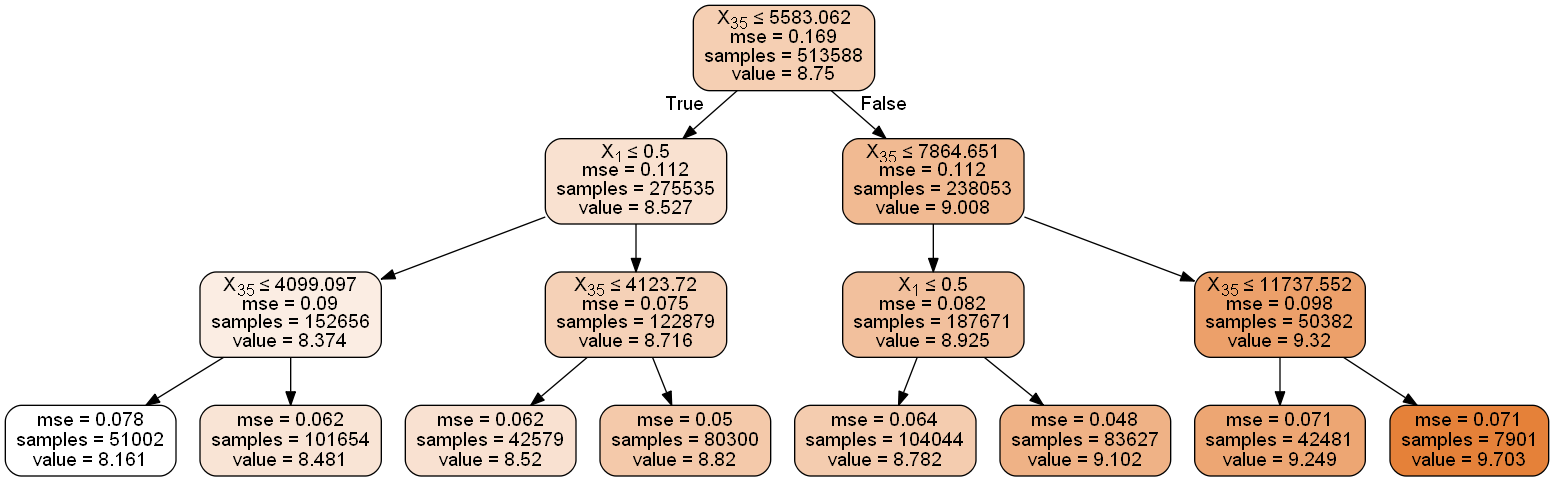

In [91]:
from IPython.display import display, Image
import pydotplus
from sklearn import tree

# Now plot the trees individually
for dtree in m.estimators_:
    dot_data = tree.export_graphviz(dtree
                                    , out_file = None
                                    , filled   = True
                                    , rounded  = True
                                    , special_characters = True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    img = Image(graph.create_png())
    display(img)
   # draw_tree(inp_tree = dtree)